# Importing Libraries

In [2]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Importing Dataset

In [3]:
from google.colab import files

uploaded = files.upload()


Saving Business Analysts Salaries.xlsx to Business Analysts Salaries.xlsx


In [4]:
# Loading the dataset
file_path = 'Business Analysts Salaries.xlsx'
data = pd.ExcelFile(file_path)

The dataset contains two sheets:

data_cleaned_2021: The main dataset with business analyst information.

description of variable: Provides metadata or explanations of the variables.

In [5]:
# Loading the main dataset and variable descriptions
main_data = data.parse('data_cleaned_2021')
variable_descriptions = data.parse('description of variable')

#Data Pre-processing

In [6]:
main_data.head()

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,...,0,0,1,1,0,0,0,data scientist,na,M
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+,1984,...,0,0,0,0,0,0,0,data scientist,na,M
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 - 1000,2010,...,0,0,0,0,0,0,0,data scientist,na,M
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 - 5000,1965,...,0,0,0,0,0,0,0,data scientist,na,na
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 - 200,1998,...,0,0,0,0,0,0,0,data scientist,na,na


In [7]:
main_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 42 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               742 non-null    int64  
 1   Job Title           742 non-null    object 
 2   Salary Estimate     742 non-null    object 
 3   Job Description     742 non-null    object 
 4   Rating              742 non-null    float64
 5   Company Name        742 non-null    object 
 6   Location            742 non-null    object 
 7   Headquarters        742 non-null    object 
 8   Size                742 non-null    object 
 9   Founded             742 non-null    int64  
 10  Type of ownership   742 non-null    object 
 11  Industry            742 non-null    object 
 12  Sector              742 non-null    object 
 13  Revenue             742 non-null    object 
 14  Competitors         742 non-null    object 
 15  Hourly              742 non-null    int64  
 16  Employer

In [8]:
variable_descriptions.head()

,index,Index
0,Job Title,"The title of job, eg. Data scientist, junior d..."
1,Salary Estimate,Range of salary and the source
2,Job Description,Tells us what qualities that company want and ...
3,Rating,It gives the rating of the company
4,Company Name,Name of the company\n


In [9]:
# Displaying initial information about the dataset
print("Initial Dataset Info:")
main_data.info()

Initial Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 42 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               742 non-null    int64  
 1   Job Title           742 non-null    object 
 2   Salary Estimate     742 non-null    object 
 3   Job Description     742 non-null    object 
 4   Rating              742 non-null    float64
 5   Company Name        742 non-null    object 
 6   Location            742 non-null    object 
 7   Headquarters        742 non-null    object 
 8   Size                742 non-null    object 
 9   Founded             742 non-null    int64  
 10  Type of ownership   742 non-null    object 
 11  Industry            742 non-null    object 
 12  Sector              742 non-null    object 
 13  Revenue             742 non-null    object 
 14  Competitors         742 non-null    object 
 15  Hourly              742 non-null   

In [10]:
# Dropping irrelevant columns
columns_to_drop = ['index', 'Job Description', 'Competitors', 'company_txt', 'Hourly', 'Employer provided','seniority_by_title']
main_data_cleaned = main_data.drop(columns=columns_to_drop, axis=1)
print(f"\nColumns dropped: {columns_to_drop}")


Columns dropped: ['index', 'Job Description', 'Competitors', 'company_txt', 'Hourly', 'Employer provided', 'seniority_by_title']


In [11]:
main_data_cleaned.head() #checking dataframe after dropping irrelevant columns

,Job Title,Salary Estimate,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,...,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,Degree
0,Data Scientist,$53K-$91K (Glassdoor est.),3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,Company - Private,Aerospace & Defense,...,0,0,0,1,1,0,0,0,data scientist,M
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+,1984,Other Organization,Health Care Services & Hospitals,...,0,0,0,0,0,0,0,0,data scientist,M
2,Data Scientist,$80K-$90K (Glassdoor est.),4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 - 1000,2010,Company - Private,Security Services,...,0,0,0,0,0,0,0,0,data scientist,M
3,Data Scientist,$56K-$97K (Glassdoor est.),3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 - 5000,1965,Government,Energy,...,0,0,0,0,0,0,0,0,data scientist,na
4,Data Scientist,$86K-$143K (Glassdoor est.),2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 - 200,1998,Company - Private,Advertising & Marketing,...,0,0,0,0,0,0,0,0,data scientist,na


In [12]:
# checking for missing values
main_data_cleaned.isnull().sum()


,0
Job Title,0
Salary Estimate,0
Rating,0
Company Name,0
Location,0
Headquarters,0
Size,0
Founded,0
Type of ownership,0
Industry,0


There are no missing values.

In [13]:
# Checking for duplicate rows
duplicate_count = main_data_cleaned.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_count}")
main_data_cleaned = main_data_cleaned.drop_duplicates() #dropping duplicate rows
print(f"\nDuplicate rows removed.")


Number of duplicate rows: 275

Duplicate rows removed.


In [14]:
# Ensuring consistent data types
main_data_cleaned['Rating'] = main_data_cleaned['Rating'].astype(float)
main_data_cleaned['Lower Salary'] = main_data_cleaned['Lower Salary'].astype(int)
main_data_cleaned['Upper Salary'] = main_data_cleaned['Upper Salary'].astype(int)
main_data_cleaned['Avg Salary(K)'] = main_data_cleaned['Avg Salary(K)'].astype(float)
main_data_cleaned['Age'] = main_data_cleaned['Age'].astype(int)

In [15]:
# Adding new column [Salary Range]
main_data_cleaned['Salary Range'] = main_data_cleaned['Upper Salary'] - main_data_cleaned['Lower Salary']

In [16]:
#Dropping Rows with negative values

# Count the total number of rows before cleaning
total_rows_before = len(main_data_cleaned)

# Count the total number of rows containing -1
total_rows_with_minus1 = len(main_data_cleaned[(main_data_cleaned == -1).any(axis=1)])

# Drop all rows where any column contains -1
data_cleaned = main_data_cleaned[(main_data_cleaned != -1).all(axis=1)]

# Count the total number of rows after cleaning
total_rows_after = len(data_cleaned)

# Calculate the number of rows dropped
rows_dropped = total_rows_before - total_rows_after

# Display the results
print(f"Total number of rows before cleaning: {total_rows_before}")
print(f"Total number of rows containing '-1' and dropped: {total_rows_with_minus1}")
print(f"Total number of rows after cleaning: {total_rows_after}")
print(f"Total number of rows dropped: {rows_dropped}")

# Check the cleaned dataset
print(data_cleaned.head())


Total number of rows before cleaning: 467
Total number of rows containing '-1' and dropped: 34
Total number of rows after cleaning: 433
Total number of rows dropped: 34
                   Job Title              Salary Estimate  Rating  \
0             Data Scientist   $53K-$91K (Glassdoor est.)     3.8   
1  Healthcare Data Scientist  $63K-$112K (Glassdoor est.)     3.4   
2             Data Scientist   $80K-$90K (Glassdoor est.)     4.8   
3             Data Scientist   $56K-$97K (Glassdoor est.)     3.8   
4             Data Scientist  $86K-$143K (Glassdoor est.)     2.9   

                                 Company Name         Location  \
0                      Tecolote Research\n3.8  Albuquerque, NM   
1  University of Maryland Medical System\n3.4    Linthicum, MD   
2                                KnowBe4\n4.8   Clearwater, FL   
3                                   PNNL\n3.8     Richland, WA   
4                     Affinity Solutions\n2.9     New York, NY   

     Headquarters  

In [17]:
# Checking the final dataset again
print("\nFinal Dataset Info:")
data_cleaned.info()


Final Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 433 entries, 0 to 735
Data columns (total 36 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          433 non-null    object 
 1   Salary Estimate    433 non-null    object 
 2   Rating             433 non-null    float64
 3   Company Name       433 non-null    object 
 4   Location           433 non-null    object 
 5   Headquarters       433 non-null    object 
 6   Size               433 non-null    object 
 7   Founded            433 non-null    int64  
 8   Type of ownership  433 non-null    object 
 9   Industry           433 non-null    object 
 10  Sector             433 non-null    object 
 11  Revenue            433 non-null    object 
 12  Lower Salary       433 non-null    int64  
 13  Upper Salary       433 non-null    int64  
 14  Avg Salary(K)      433 non-null    float64
 15  Job Location       433 non-null    object 
 16  Age       

Final Dataset contains 433 rows and 36 columns

In [18]:
# Saving the cleaned dataset
data_cleaned.to_csv('Cleaned_Business_Analysts_Salaries.csv', index=False)
print("\nCleaned dataset saved as 'Cleaned_Business_Analysts_Salaries.csv'")


Cleaned dataset saved as 'Cleaned_Business_Analysts_Salaries.csv'


In [19]:
cleaned_data_path = 'Cleaned_Business_Analysts_Salaries.csv'
data = pd.read_csv(cleaned_data_path)

# Data Exploration

In [20]:
data.head()

,Job Title,Salary Estimate,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,...,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,Degree,Salary Range
0,Data Scientist,$53K-$91K (Glassdoor est.),3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,Company - Private,Aerospace & Defense,...,0,0,1,1,0,0,0,data scientist,M,38
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+,1984,Other Organization,Health Care Services & Hospitals,...,0,0,0,0,0,0,0,data scientist,M,49
2,Data Scientist,$80K-$90K (Glassdoor est.),4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 - 1000,2010,Company - Private,Security Services,...,0,0,0,0,0,0,0,data scientist,M,10
3,Data Scientist,$56K-$97K (Glassdoor est.),3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 - 5000,1965,Government,Energy,...,0,0,0,0,0,0,0,data scientist,na,41
4,Data Scientist,$86K-$143K (Glassdoor est.),2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 - 200,1998,Company - Private,Advertising & Marketing,...,0,0,0,0,0,0,0,data scientist,na,57


In [21]:
data.shape

(433, 36)

In [22]:
data.dtypes

,0
Job Title,object
Salary Estimate,object
Rating,float64
Company Name,object
Location,object
Headquarters,object
Size,object
Founded,int64
Type of ownership,object
Industry,object


In [23]:
# Summary statistics for numerical columns
numerical_columns = ['Rating', 'Lower Salary', 'Upper Salary', 'Avg Salary(K)', 'Age']
summary_stats = data[numerical_columns].describe()

print("Summary Statistics:")
print(summary_stats)

Summary Statistics:
           Rating  Lower Salary  Upper Salary  Avg Salary(K)         Age
count  433.000000    433.000000    433.000000     433.000000  433.000000
mean     3.733487     74.124711    128.027714     101.076212   49.254042
std      0.560928     29.593279     44.448463      36.548135   52.810590
min      1.900000     15.000000     16.000000      15.500000    2.000000
25%      3.400000     53.000000     97.000000      75.500000   13.000000
50%      3.800000     69.000000    124.000000      97.000000   26.000000
75%      4.100000     90.000000    151.000000     121.000000   63.000000
max      5.000000    202.000000    306.000000     254.000000  277.000000


**Salary Disparity:** The Avg Salary (K): has an average of 101.07K, with a range from 15.5K to 254K. This suggests that while many individuals earn closer to the average (around 101.07K), there are a few earning significantly higher (up to 254K), which skews the average upwards. The IQR for average salary is from 75.5K to 121K. There's significant variation in salary, with a notable gap between ranges for both lower salary and upper salary. This may imply that some job titles may be very low-paying, while others are very high-paying.

**Age of Company:** The average age of 49.25 years suggests a relatively mature company population, however, the age distribution is skewed with 50% of the observations falling between 13 and 63 years old. The median (25 and 50 percentiles) is closer to the younger end of the spectrum, indicating that more participating companies are relatively younger. The very high standard deviation (52.8 years) and the extremely wide age range from 2 years to  of 277 years suggest that there may be some significant outliers or data entry errors that need to be further investigated.

**Rating Distribution:** The ratings are relatively high on average (mean of 3.73), but the range (from 1.9 to 5) suggests that there are companies with very poor ratings. This may indicate some dissatisfaction within certain job titles.

# Univariate Analysis

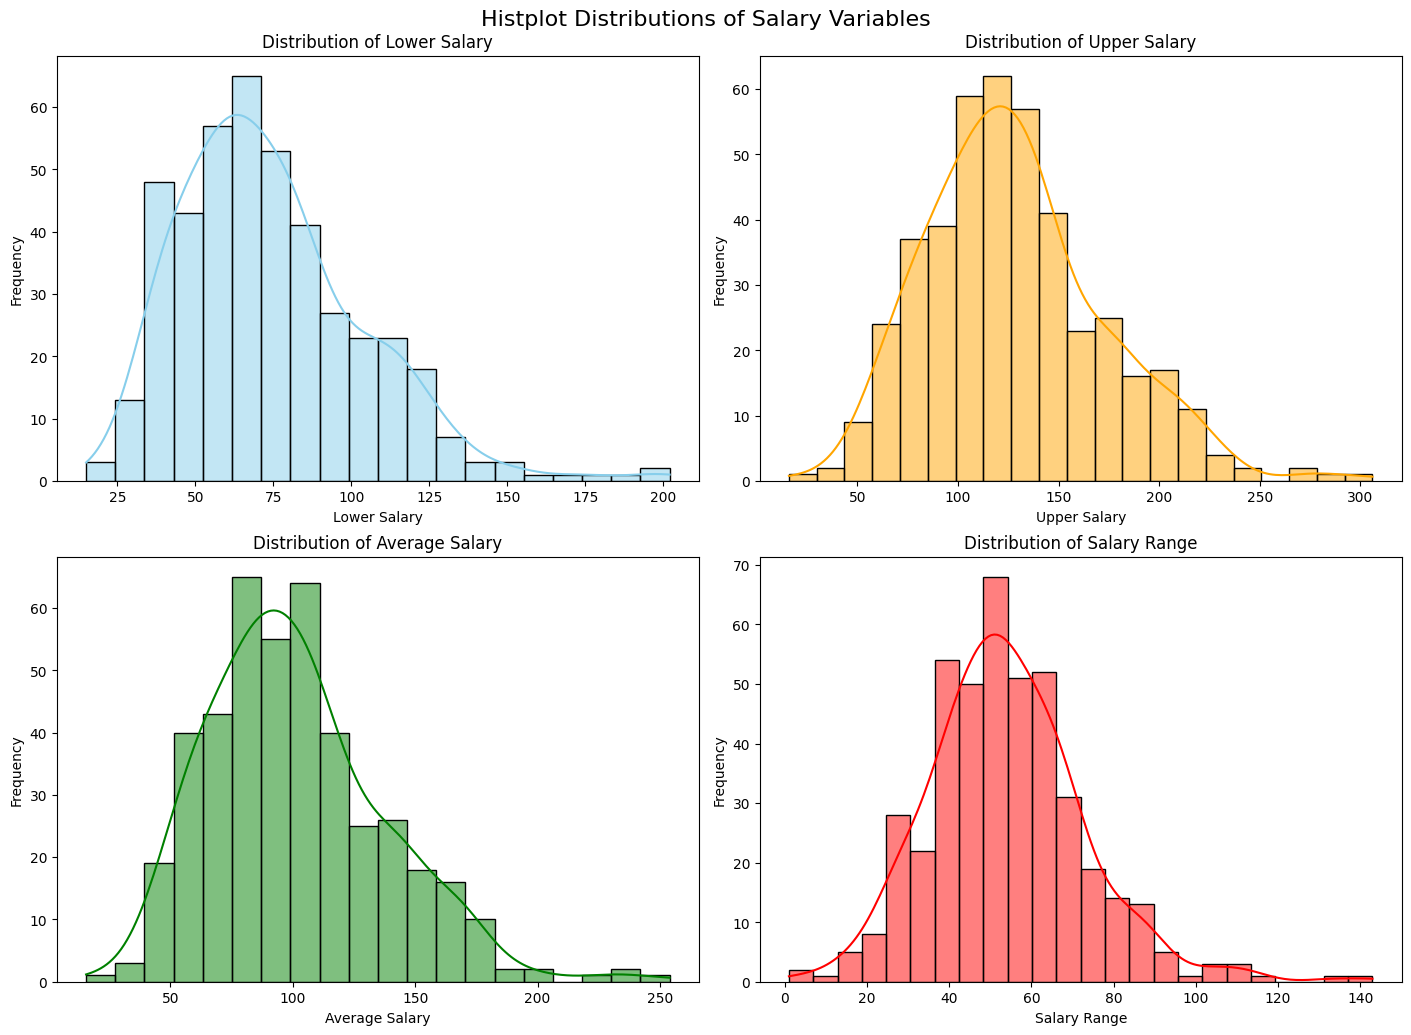

In [24]:
# Setting up the grid layout for the subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10), constrained_layout=True)

# Plotting histogram for Lower Salary
sns.histplot(data=data, x='Lower Salary', kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Distribution of Lower Salary', fontsize=12)
axes[0, 0].set_xlabel('Lower Salary', fontsize=10)
axes[0, 0].set_ylabel('Frequency', fontsize=10)

# Plotting histogram for Upper Salary
sns.histplot(data=data, x='Upper Salary', kde=True, ax=axes[0, 1], color='orange')
axes[0, 1].set_title('Distribution of Upper Salary', fontsize=12)
axes[0, 1].set_xlabel('Upper Salary', fontsize=10)
axes[0, 1].set_ylabel('Frequency', fontsize=10)

# Plotting histogram for Average Salary
sns.histplot(data=data, x='Avg Salary(K)', kde=True, ax=axes[1, 0], color='green')
axes[1, 0].set_title('Distribution of Average Salary', fontsize=12)
axes[1, 0].set_xlabel('Average Salary', fontsize=10)
axes[1, 0].set_ylabel('Frequency', fontsize=10)

# Plotting histogram for Salary Range
if 'Salary Range' in data.columns:  # Ensure Salary Range exists
    sns.histplot(data=data, x='Salary Range', kde=True, ax=axes[1, 1], color='red')
    axes[1, 1].set_title('Distribution of Salary Range', fontsize=12)
    axes[1, 1].set_xlabel('Salary Range', fontsize=10)
    axes[1, 1].set_ylabel('Frequency', fontsize=10)
else:
    axes[1, 1].text(0.5, 0.5, 'Salary Range Column Missing', ha='center', va='center', fontsize=12)
    axes[1, 1].set_title('Salary Range', fontsize=12)

# Displaying the plot
plt.suptitle('Histplot Distributions of Salary Variables', fontsize=16, y=1.02)
plt.show()

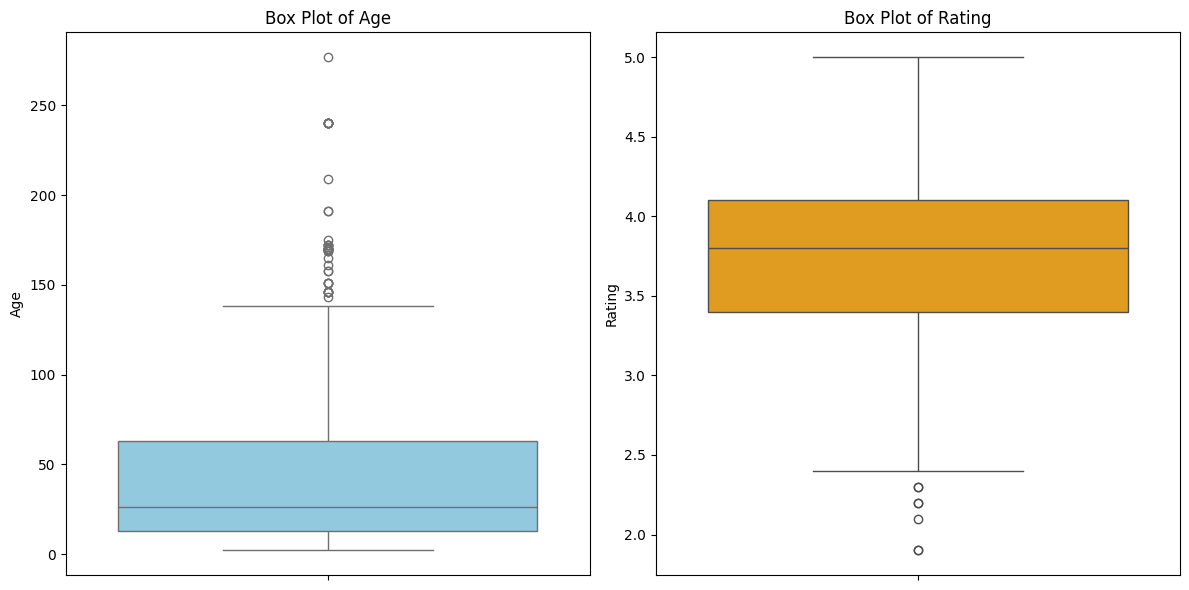

In [25]:
# Setting up the figure for side-by-side box plots
plt.figure(figsize=(12, 6))

# Creating a subplot for Age
plt.subplot(1, 2, 1)
sns.boxplot(data=data, y='Age', color='skyblue')
plt.title('Box Plot of Age', fontsize=12)
plt.ylabel('Age', fontsize=10)
plt.xlabel('')

# Creating a subplot for Rating
plt.subplot(1, 2, 2)
sns.boxplot(data=data, y='Rating', color='orange')
plt.title('Box Plot of Rating', fontsize=12)
plt.ylabel('Rating', fontsize=10)
plt.xlabel('')

# Displaying the plots
plt.tight_layout()
plt.show()

<ipython-input-42-1983e84ad4e8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='job_title_sim', data=data, order=data['job_title_sim'].value_counts().index, palette='Set2')


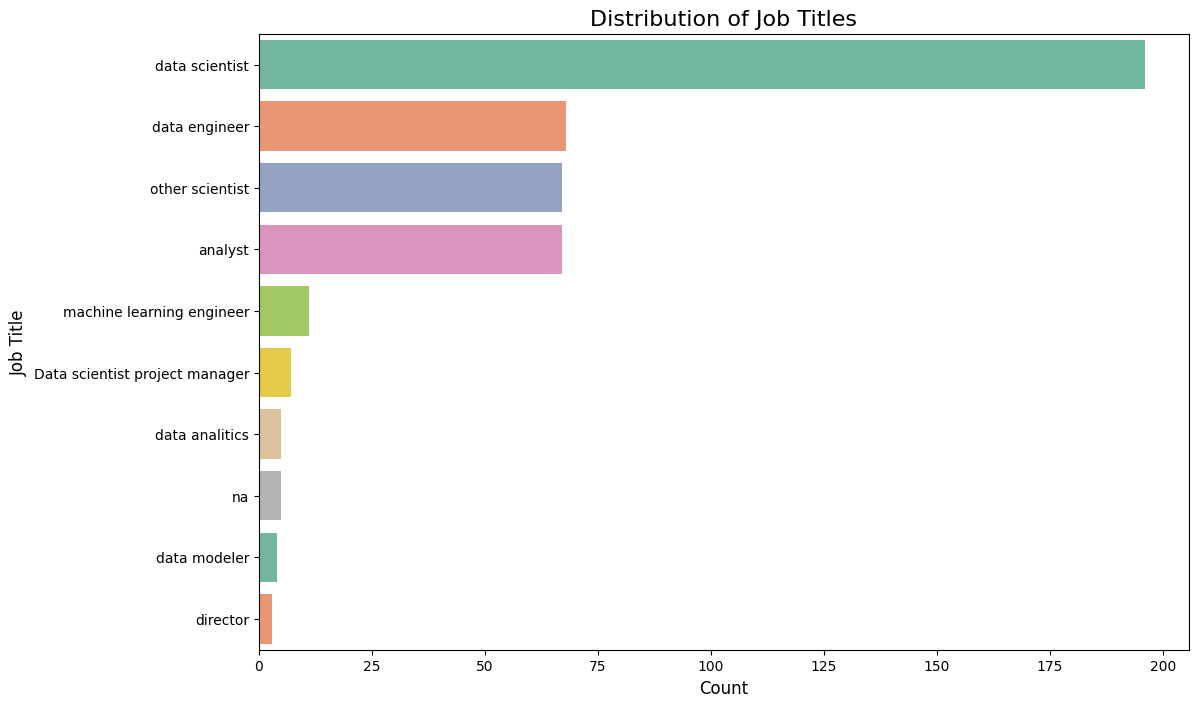

In [42]:
#Barplot for Job Titles (grouped by frequency)
plt.figure(figsize=(12, 8))
sns.countplot(y='job_title_sim', data=data, order=data['job_title_sim'].value_counts().index, palette='Set2')
plt.title('Distribution of Job Titles', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Job Title', fontsize=12)
plt.show()

# Bi-variate  and Multivariate Analysis

<ipython-input-49-076d244106fc>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='job_title_sim', y='Avg Salary(K)', data=sorted_data, palette='pastel', ci=None, order=order)
<ipython-input-49-076d244106fc>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='job_title_sim', y='Avg Salary(K)', data=sorted_data, palette='pastel', ci=None, order=order)


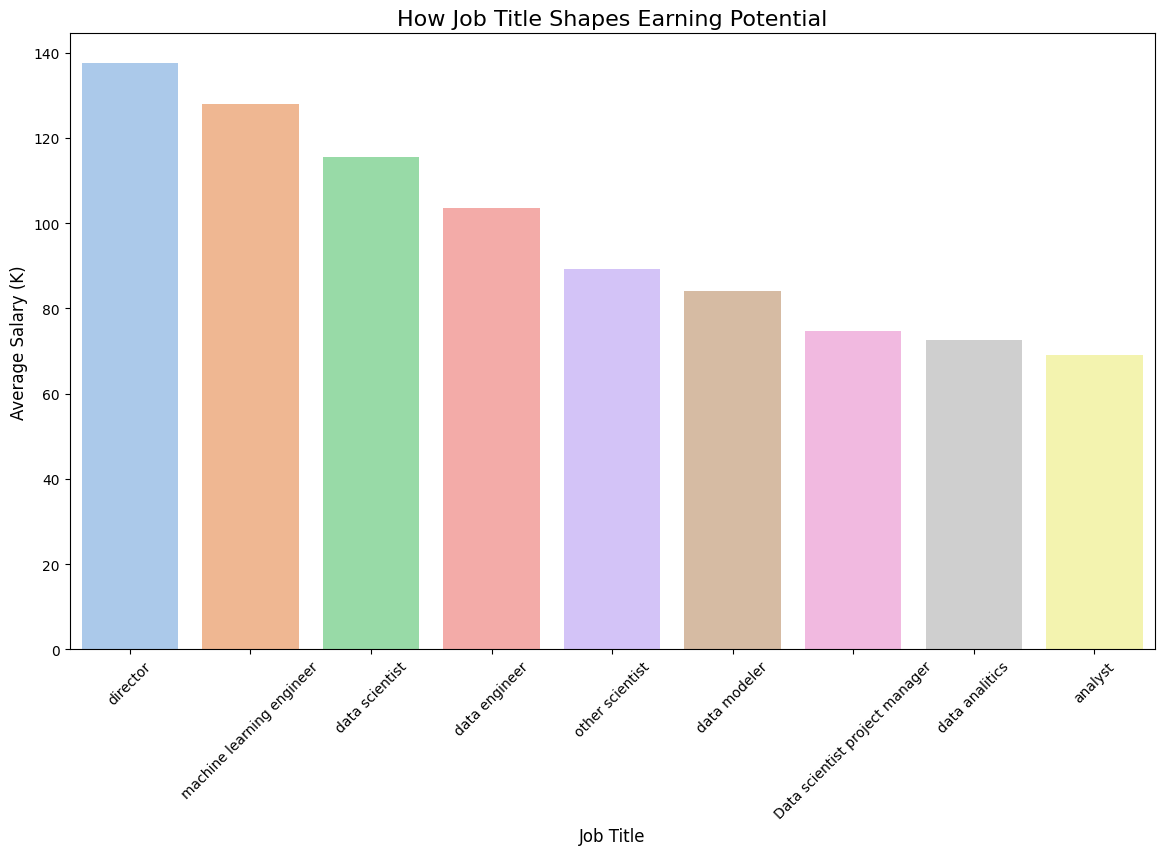

In [49]:
# Plotting Salary vs Job Position
plt.figure(figsize=(14, 8))

sorted_data=data.groupby('job_title_sim')['Avg Salary(K)'].mean().sort_values(ascending=False).reset_index()
sorted_data=sorted_data[sorted_data['job_title_sim']!='na']

# Get the order of job titles based on sorted data
order = sorted_data['job_title_sim'].unique()

# Use the 'order' parameter in sns.barplot
sns.barplot(x='job_title_sim', y='Avg Salary(K)', data=sorted_data, palette='pastel', ci=None, order=order)

# Set plot labels and title
plt.title('How Job Title Shapes Earning Potential', fontsize=16)
plt.xlabel('Job Title', fontsize=12)
plt.ylabel('Average Salary (K)', fontsize=12)

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

<ipython-input-35-beddcf08a6d4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Degree'] = filtered_data['Degree'].replace({'M': 'Masters', 'P': 'PhD'})
<ipython-input-35-beddcf08a6d4>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Degree', y='Avg Salary(K)', data=filtered_data, palette='muted', ci=None)
<ipython-input-35-beddcf08a6d4>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Degree', y='Avg Salary(K)', data=filtered_data, palette='muted', ci=None)


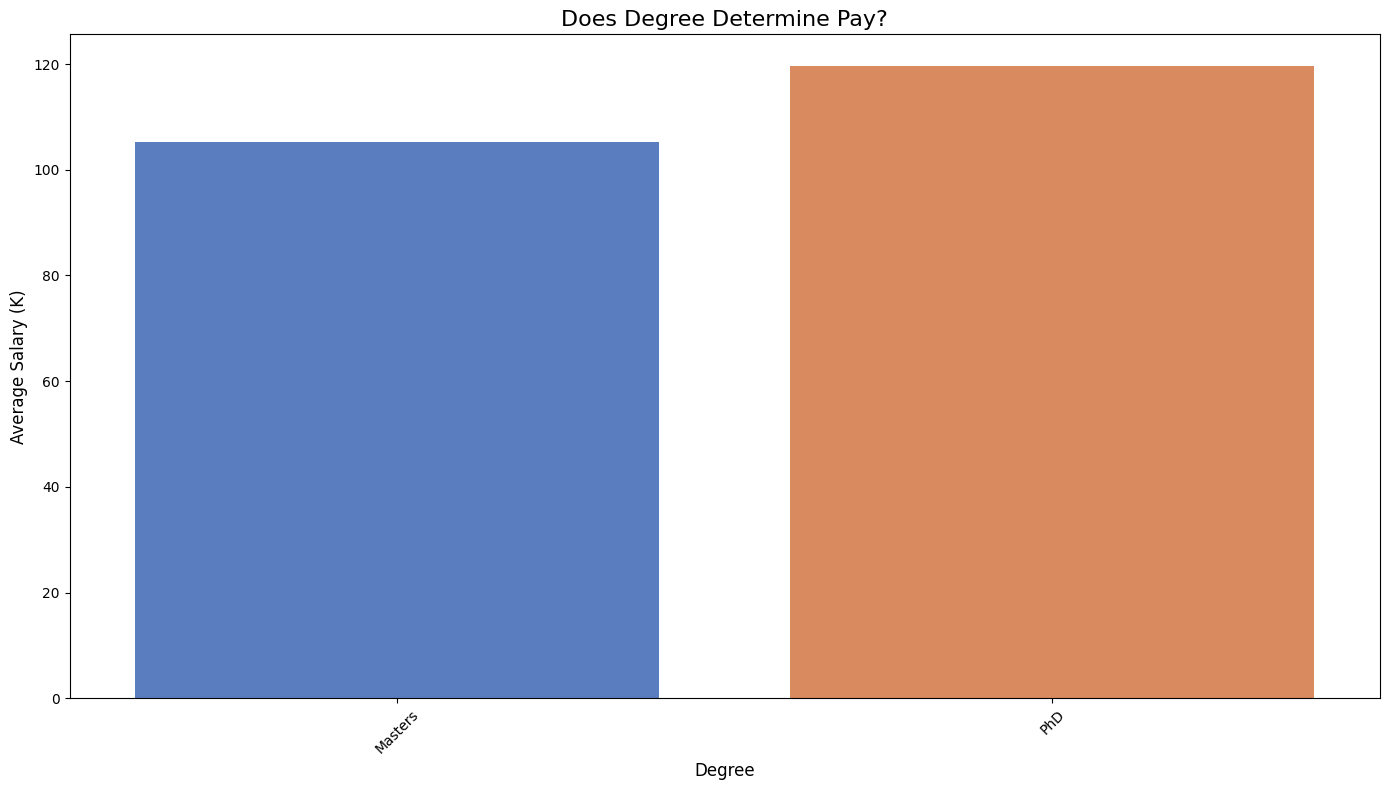

In [35]:
# Does Educational Qualification affect average salary paid?
# Filtering out rows where 'Degree' is 'na' and renaming 'M' to 'Masters' and 'P' to 'PhD'
filtered_data = data[data['Degree'] != 'na']
filtered_data['Degree'] = filtered_data['Degree'].replace({'M': 'Masters', 'P': 'PhD'})

# Plotting Average Salary by Educational Qualification (without error bars)
plt.figure(figsize=(14, 8))
sns.barplot(x='Degree', y='Avg Salary(K)', data=filtered_data, palette='muted', ci=None)

# Title and labels
plt.title('Does Degree Determine Pay?', fontsize=16)
plt.xlabel('Degree', fontsize=12)
plt.ylabel('Average Salary (K)', fontsize=12)

# Rotate x-tick labels for readability
plt.xticks(rotation=45)

# Tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


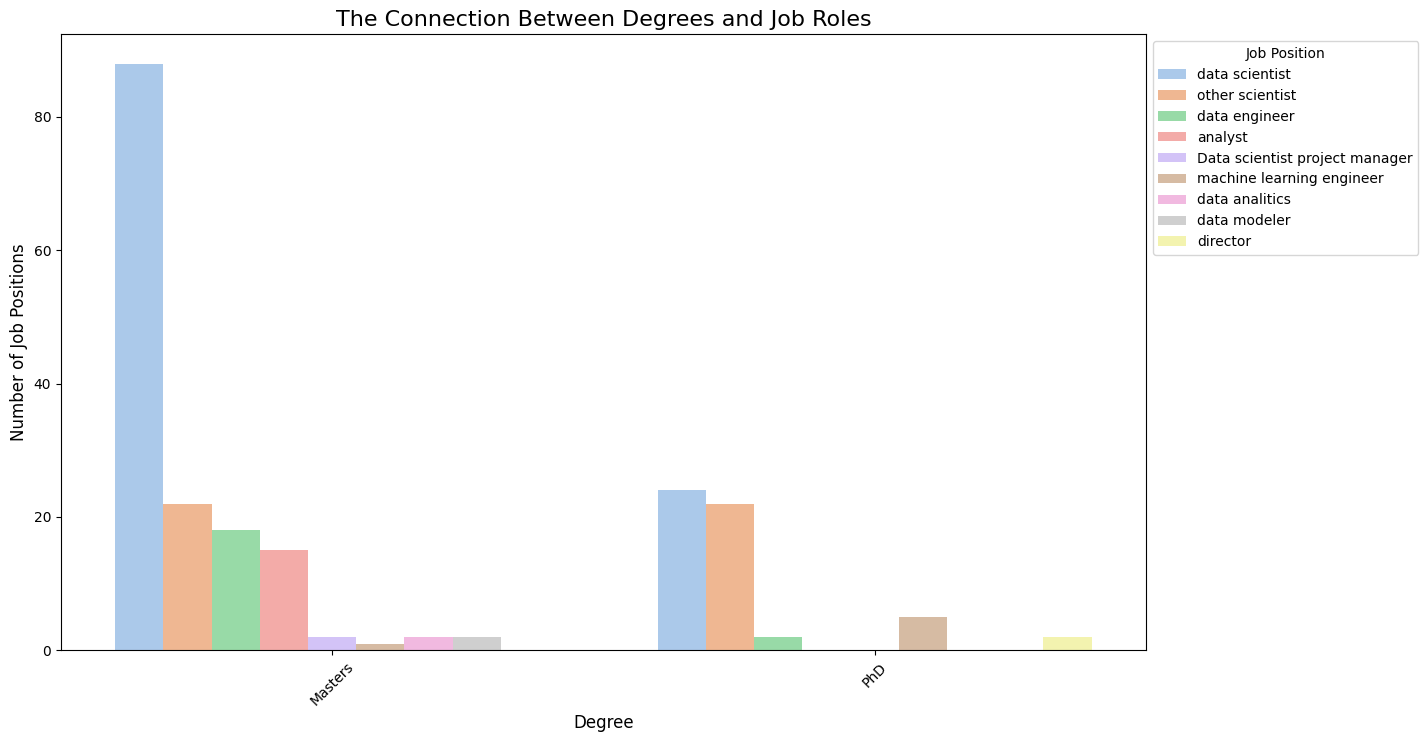

In [36]:
# Filtering out rows where 'job_title_sim' is 'na'
filtered_data = filtered_data[filtered_data['job_title_sim'] != 'na']

# Countplot to show Degree vs Job Position (Job Title)
plt.figure(figsize=(14, 8))
sns.countplot(x='Degree', hue='job_title_sim', data=filtered_data, palette='pastel')

# Title and labels
plt.title('The Connection Between Degrees and Job Roles', fontsize=16)
plt.xlabel('Degree', fontsize=12)
plt.ylabel('Number of Job Positions', fontsize=12)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Move the legend to the side
plt.legend(title='Job Position', loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()


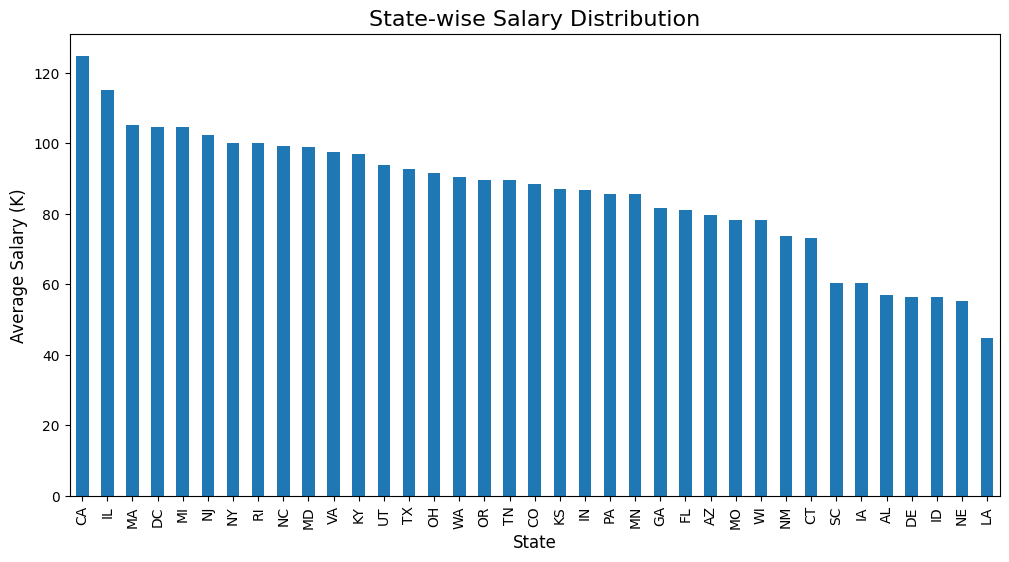

In [39]:
#Does the state or Location matter?
# Bar Plot: State-wise Salary Distribution
plt.figure(figsize=(12, 6))

# Grouping by Job Location and calculating the mean salary, then sorting it in descending order
state_salary = data.groupby('Job Location')['Avg Salary(K)'].mean().sort_values(ascending=False)

# Plotting the bar chart
state_salary.plot(kind='bar')

# Adding title and labels
plt.title('State-wise Salary Distribution', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Average Salary (K)', fontsize=12)
plt.xticks(rotation=90)  # Rotate x-axis labels for readability

# Display the bar chart
plt.show()

<ipython-input-168-82432bfdd30e>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_locations.index, y=top_10_locations.values, palette='coolwarm')


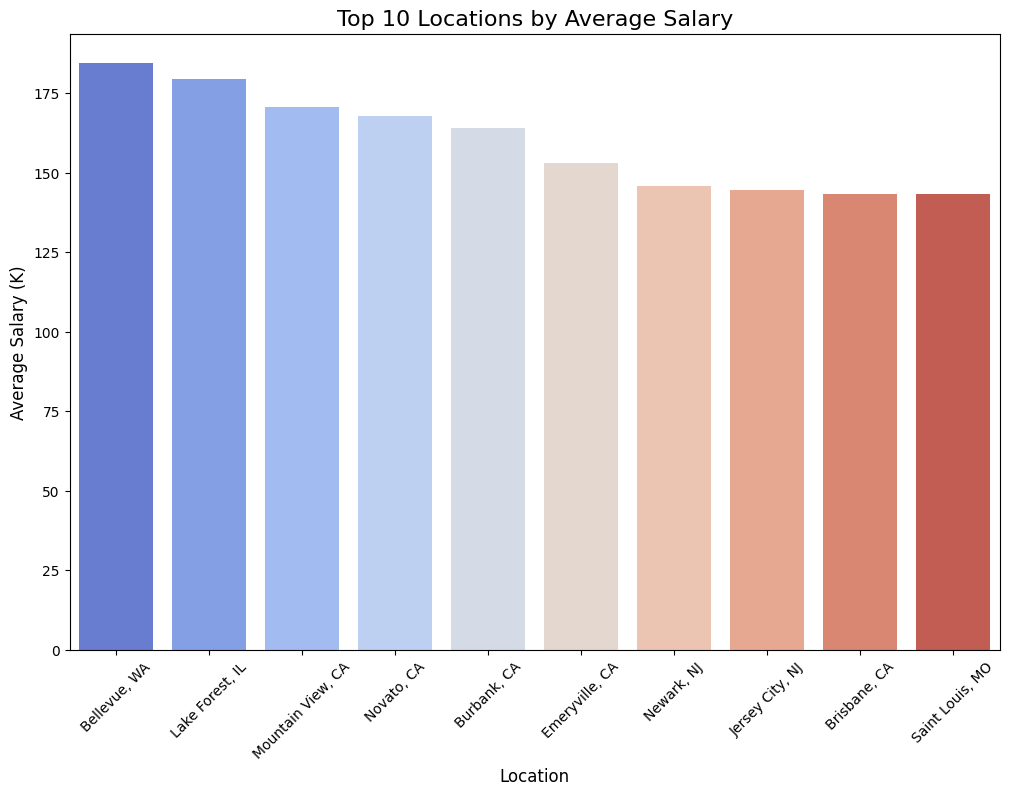

In [ ]:
#How does location affect average salary earned
# Grouping data by 'Location' and calculate the average salary
location_salary_avg = data.groupby('Location')['Avg Salary(K)'].mean()

# Sorting by average salary in descending order and select the top 10
top_10_locations = location_salary_avg.sort_values(ascending=False).head(10)

#Plotting a bar plot for the top 10 locations
plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_locations.index, y=top_10_locations.values, palette='coolwarm')
plt.title('Top 10 Locations by Average Salary', fontsize=16)
plt.xlabel('Location', fontsize=12)
plt.ylabel('Average Salary (K)', fontsize=12)
plt.xticks(rotation=45)  # Rotate labels to prevent overlap
plt.show()

<ipython-input-73-a2264454b53f>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_sectors.values, y=top_10_sectors.index, palette='viridis')


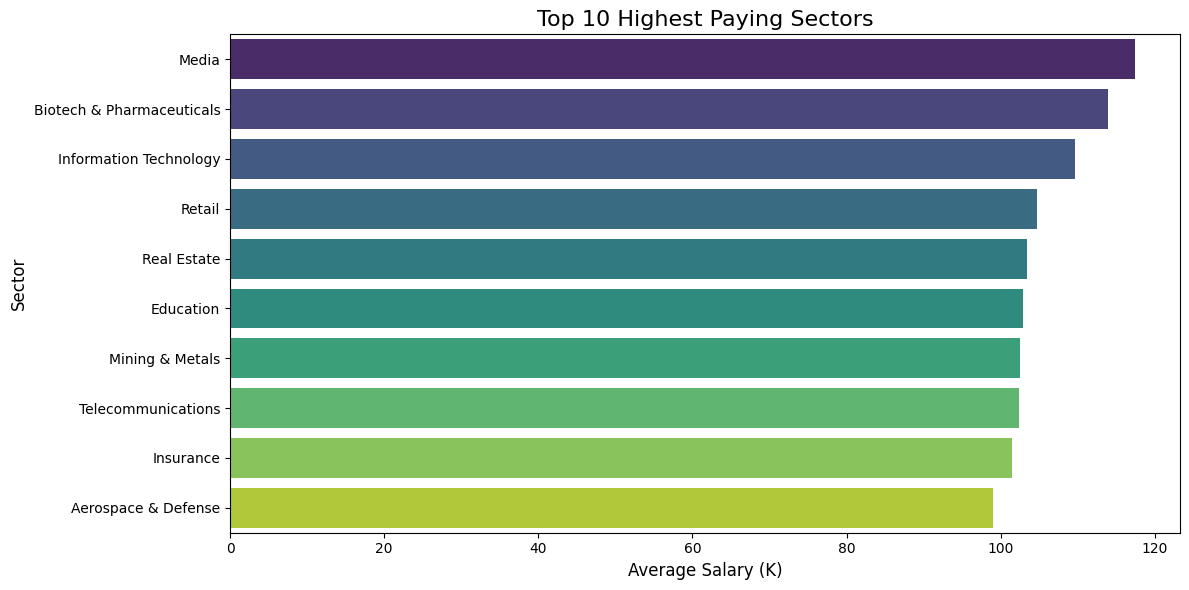

In [ ]:
# Grouping by Sector and calculating the average salary
sector_salary = data.groupby('Sector')['Avg Salary(K)'].mean().sort_values(ascending=False)

# Selecting the top 10 highest paying sectors
top_10_sectors = sector_salary.head(10)

# Visualizing the top 10 sectors
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_sectors.values, y=top_10_sectors.index, palette='viridis')
plt.title('Top 10 Highest Paying Sectors', fontsize=16)
plt.xlabel('Average Salary (K)', fontsize=12)
plt.ylabel('Sector', fontsize=12)
plt.tight_layout()
plt.show()


<ipython-input-71-638675a52c94>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


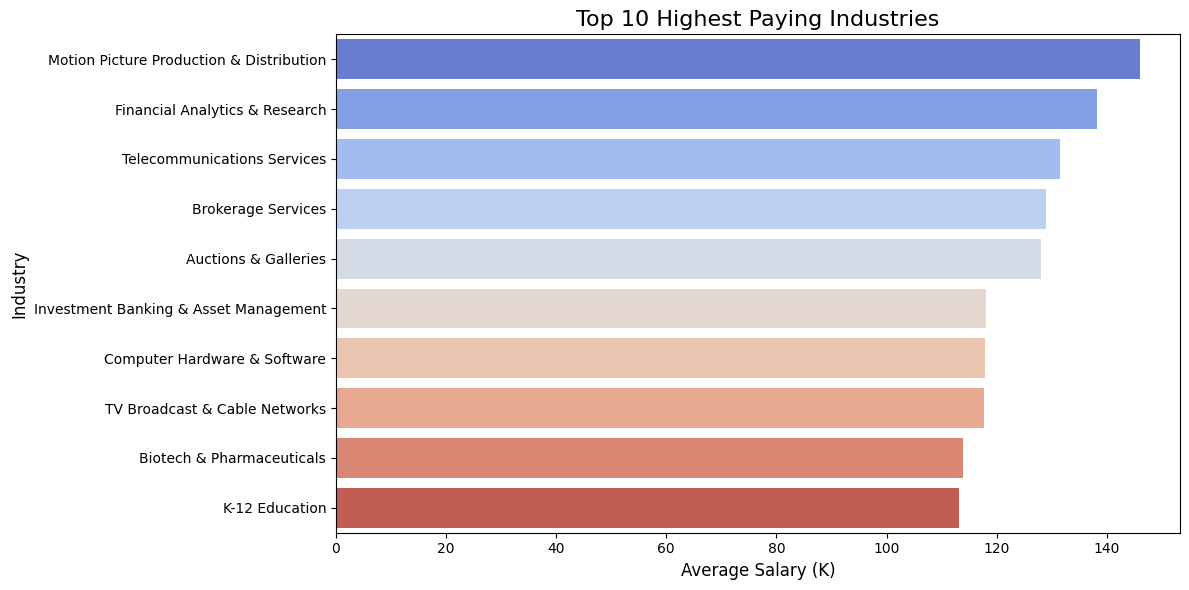

In [ ]:
# Finding the top 10 industries that pay the most average salaries

# Filter out rows where 'Industry' is 'Other Retail Store'
filtered_data = data[data['Industry'] != 'Other Retail Stores']

top_10_highest_paying_industries = (
    filtered_data.groupby('Industry')['Avg Salary(K)']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

# Plotting the top 10 industries
plt.figure(figsize=(12, 6))
sns.barplot(
    x=top_10_highest_paying_industries.values,
    y=top_10_highest_paying_industries.index,
    palette='coolwarm'
)
plt.title('Top 10 Highest Paying Industries', fontsize=16)
plt.xlabel('Average Salary (K)', fontsize=12)
plt.ylabel('Industry', fontsize=12)
plt.tight_layout()
plt.show()



In [ ]:
# List of the columns that represent the tools
tool_columns = ['Python', 'spark', 'aws', 'excel', 'sql', 'sas', 'keras',
                'pytorch', 'scikit', 'tensor', 'hadoop', 'tableau', 'bi',
                'flink', 'mongo', 'google_an']

# Melt the dataset to create a new column 'software'
software_data = data.melt(id_vars=['Job Title', 'Company Name', 'Avg Salary(K)', 'Degree', 'Salary Range','job_title_sim'],
                          value_vars=tool_columns,
                          var_name='software',
                          value_name='used')

# Filter rows where 'used' is 1 (assuming 1 means the tool is used)
software_data = software_data[software_data['used'] == 1]

# Drop the 'used' column as it's no longer needed
software_data = software_data.drop(columns=['used'])

# View the transformed data
print(software_data.head())


                   Job Title                                Company Name  \
0             Data Scientist                      Tecolote Research\n3.8   
1  Healthcare Data Scientist  University of Maryland Medical System\n3.4   
2             Data Scientist                                KnowBe4\n4.8   
3             Data Scientist                                   PNNL\n3.8   
4             Data Scientist                     Affinity Solutions\n2.9   

   Avg Salary(K) Degree  Salary Range   job_title_sim software  
0           72.0      M            38  data scientist   Python  
1           87.5      M            49  data scientist   Python  
2           85.0      M            10  data scientist   Python  
3           76.5     na            41  data scientist   Python  
4          114.5     na            57  data scientist   Python  


<ipython-input-101-ef93f06ff596>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='software', y='Avg Salary(K)', data=software_data, palette='Set3', order=sorted_software_data.index, ci=None)
<ipython-input-101-ef93f06ff596>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='software', y='Avg Salary(K)', data=software_data, palette='Set3', order=sorted_software_data.index, ci=None)


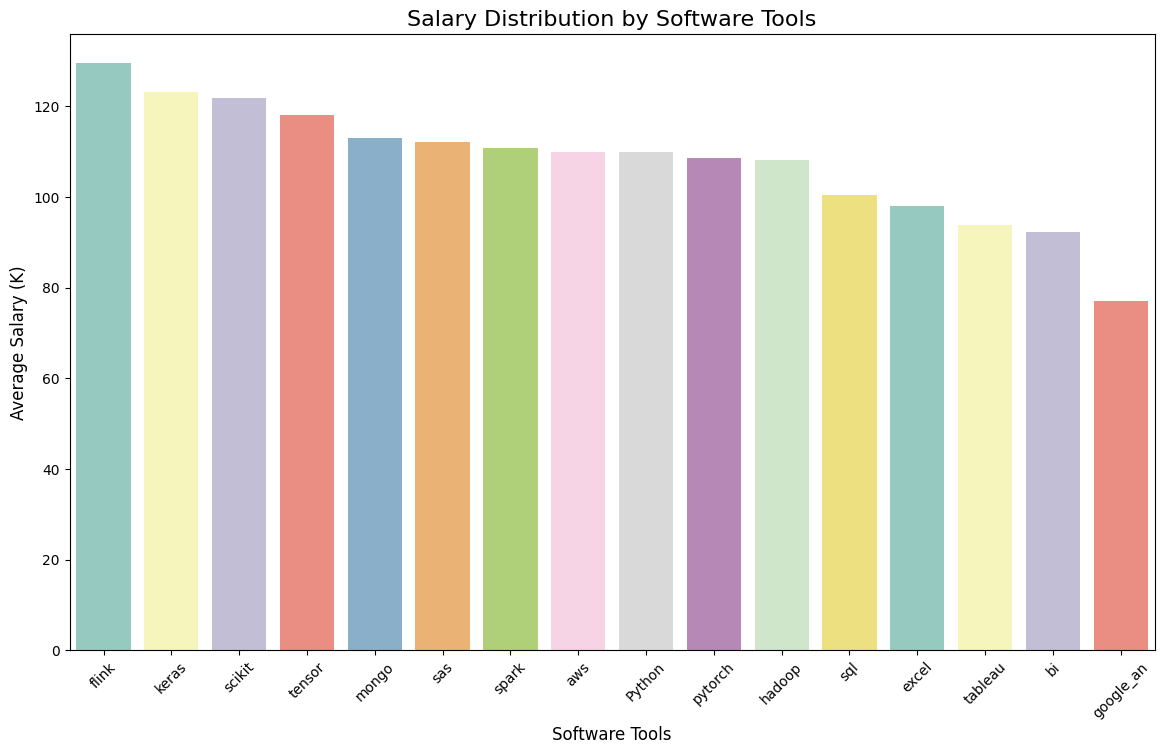

In [ ]:
# Sorting the software_data based on average salary in descending order
sorted_software_data = software_data.groupby('software')['Avg Salary(K)'].mean().sort_values(ascending=False)

# Plotting Salary vs Software Tools (Sorted)
plt.figure(figsize=(14, 8))
sns.barplot(x='software', y='Avg Salary(K)', data=software_data, palette='Set3', order=sorted_software_data.index, ci=None)

# Title and labels
plt.title('Salary Distribution by Software Tools', fontsize=16)
plt.xlabel('Software Tools', fontsize=12)
plt.ylabel('Average Salary (K)', fontsize=12)

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

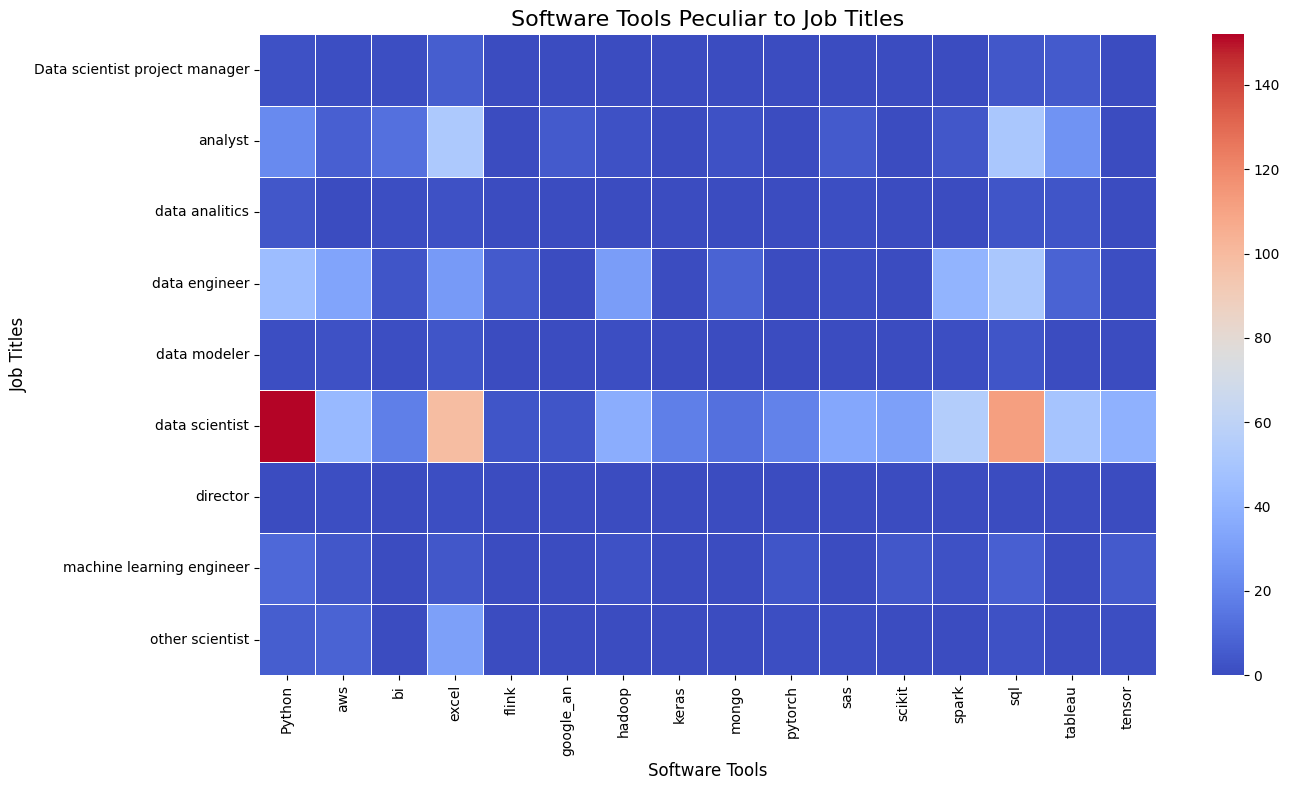

In [ ]:
# Filter out rows where 'job_title_sim' is 'na'
filtered_software_data = software_data[software_data['job_title_sim'] != 'na']

# Count the occurrences of each software tool for each job title
software_job_counts = filtered_software_data.groupby(['job_title_sim', 'software']).size().reset_index(name='Count')

# Pivot the data for a heatmap-friendly format
software_job_pivot = software_job_counts.pivot(index='job_title_sim', columns='software', values='Count').fillna(0)

# Plotting the heatmap to show tools peculiar to job titles
plt.figure(figsize=(14, 8))
sns.heatmap(software_job_pivot, annot=False, cmap='coolwarm', cbar=True, linewidths=0.5)

# Title and labels
plt.title('Software Tools Peculiar to Job Titles', fontsize=16)
plt.xlabel('Software Tools', fontsize=12)
plt.ylabel('Job Titles', fontsize=12)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


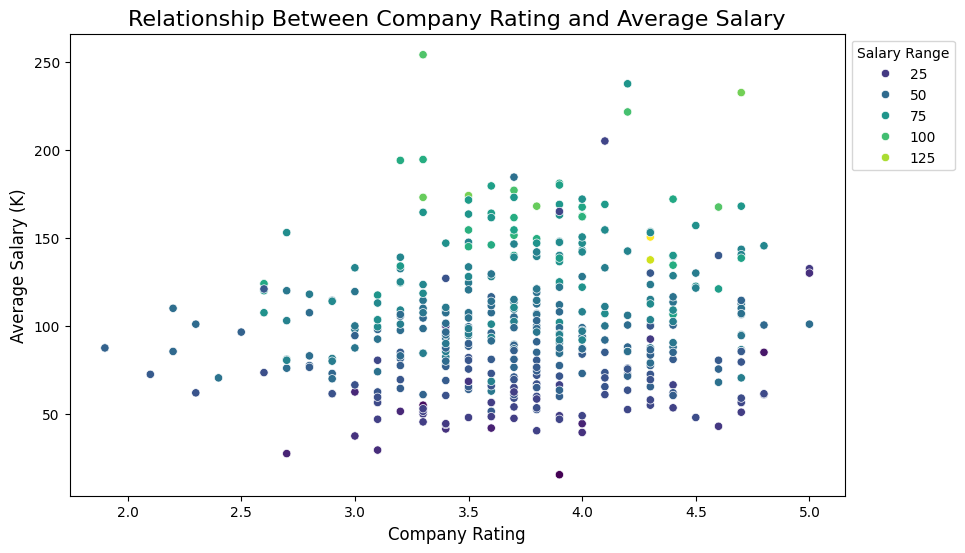

In [ ]:
# Relationship between 'Rating' and 'Avg Salary(K)'
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Rating'], y=data['Avg Salary(K)'], hue=data['Salary Range'], palette='viridis')
plt.title('Relationship Between Company Rating and Average Salary', fontsize=16)
plt.xlabel('Company Rating', fontsize=12)
plt.ylabel('Average Salary (K)', fontsize=12)
plt.legend(title='Salary Range', bbox_to_anchor=(1, 1))
plt.show()

#Do highly rated companies offer better salaries.
#Are specific rating levels associated with salary brackets.

<ipython-input-105-15a2b807251b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Rating', y='Avg Salary(K)', data=data, palette='coolwarm')


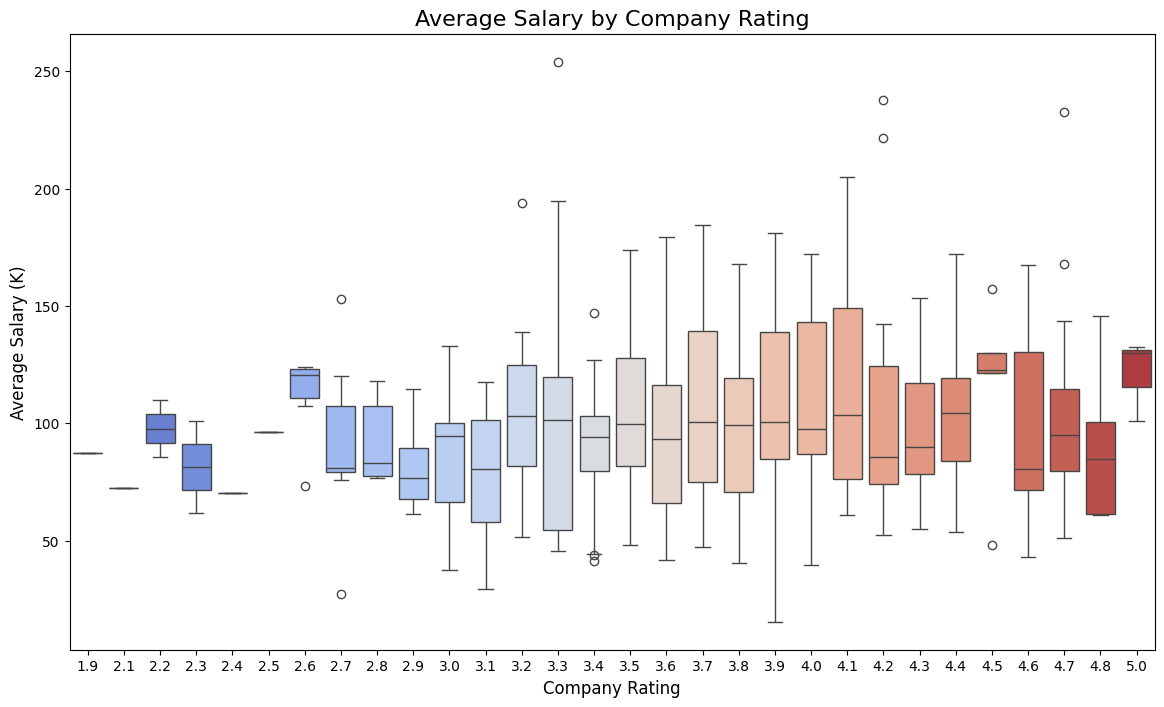

In [ ]:
#How Company Ratings Influence Salaries
plt.figure(figsize=(14, 8))
sns.boxplot(x='Rating', y='Avg Salary(K)', data=data, palette='coolwarm')
plt.title('Average Salary by Company Rating', fontsize=16)
plt.xlabel('Company Rating', fontsize=12)
plt.ylabel('Average Salary (K)', fontsize=12)
plt.show()


<ipython-input-28-1b1723709fa3>:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
<ipython-input-28-1b1723709fa3>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


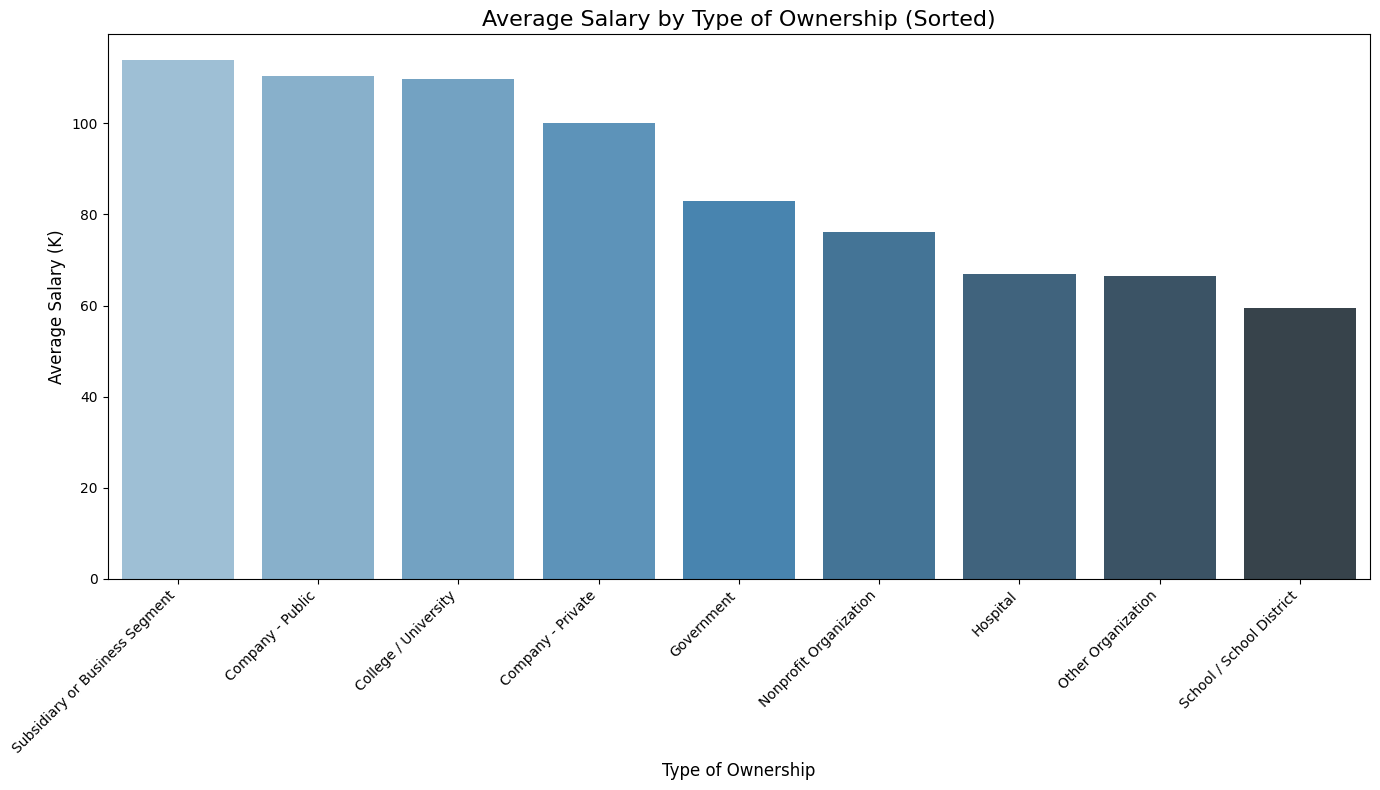

In [28]:
#Does type of ownership affect average salary earned
# Sorting the data by average salary for "Type of ownership"
ownership_avg_salary = data.groupby('Type of ownership')['Avg Salary(K)'].mean().sort_values(ascending=False)

# Creating a sorted DataFrame for plotting
sorted_data = data.copy()
sorted_data['Type of ownership'] = pd.Categorical(
    sorted_data['Type of ownership'], categories=ownership_avg_salary.index, ordered=True
)

# Setting up the figure
plt.figure(figsize=(14, 8))

# Creating the bar plot
sns.barplot(
    x='Type of ownership',
    y='Avg Salary(K)',
    data=sorted_data,
    palette='Blues_d',
    ci=None  # Removes error bars
)

# Customizing the plot
plt.title('Average Salary by Type of Ownership (Sorted)', fontsize=16)
plt.xlabel('Type of Ownership', fontsize=12)
plt.ylabel('Average Salary (K)', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotates x-axis labels for readability
plt.tight_layout()  # Adjusts layout to prevent label overlap

# Displaying the plot
plt.show()

In [ ]:
# Checking the column names in the dataset
print(data.columns)


Index(['Job Title', 'Salary Estimate', 'Rating', 'Company Name', 'Location',
       'Headquarters', 'Size', 'Founded', 'Type of ownership', 'Industry',
       'Sector', 'Revenue', 'Lower Salary', 'Upper Salary', 'Avg Salary(K)',
       'Job Location', 'Age', 'Python', 'spark', 'aws', 'excel', 'sql', 'sas',
       'keras', 'pytorch', 'scikit', 'tensor', 'hadoop', 'tableau', 'bi',
       'flink', 'mongo', 'google_an', 'job_title_sim', 'seniority_by_title',
       'Degree', 'Salary Range'],
      dtype='object')


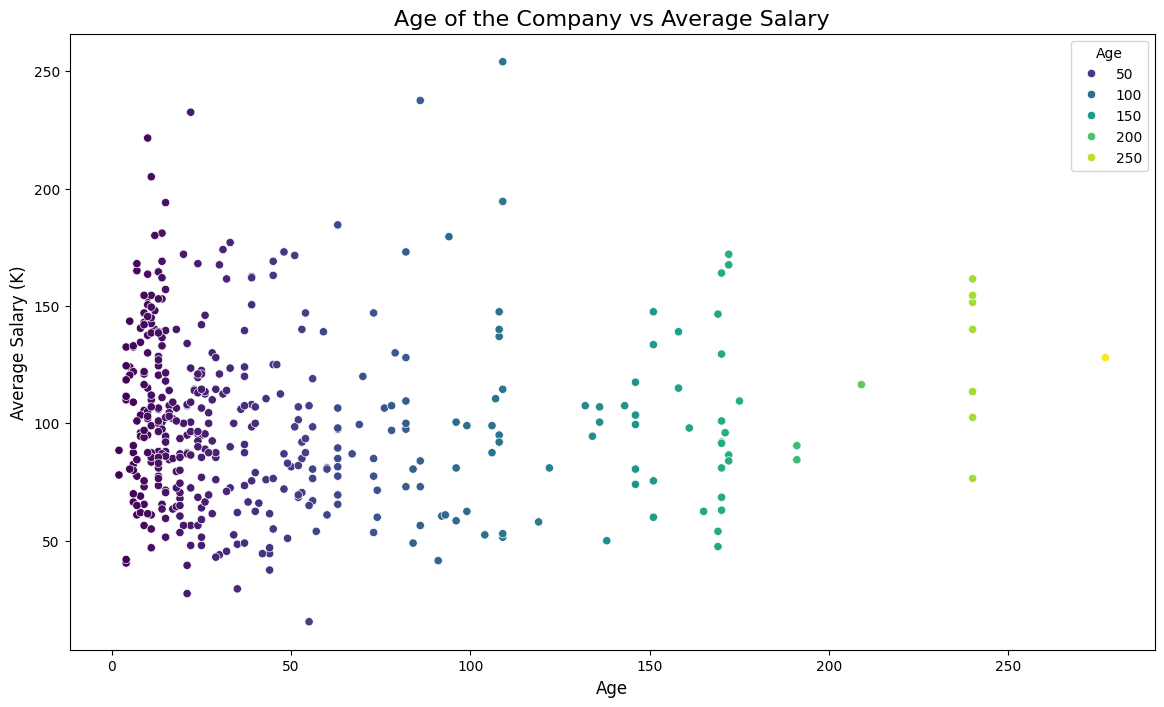

In [ ]:
plt.figure(figsize=(14, 8))
sns.scatterplot(x='Age', y='Avg Salary(K)', data=data, hue='Age', palette='viridis')
plt.title('Age of the Company vs Average Salary', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Average Salary (K)', fontsize=12)
plt.show()


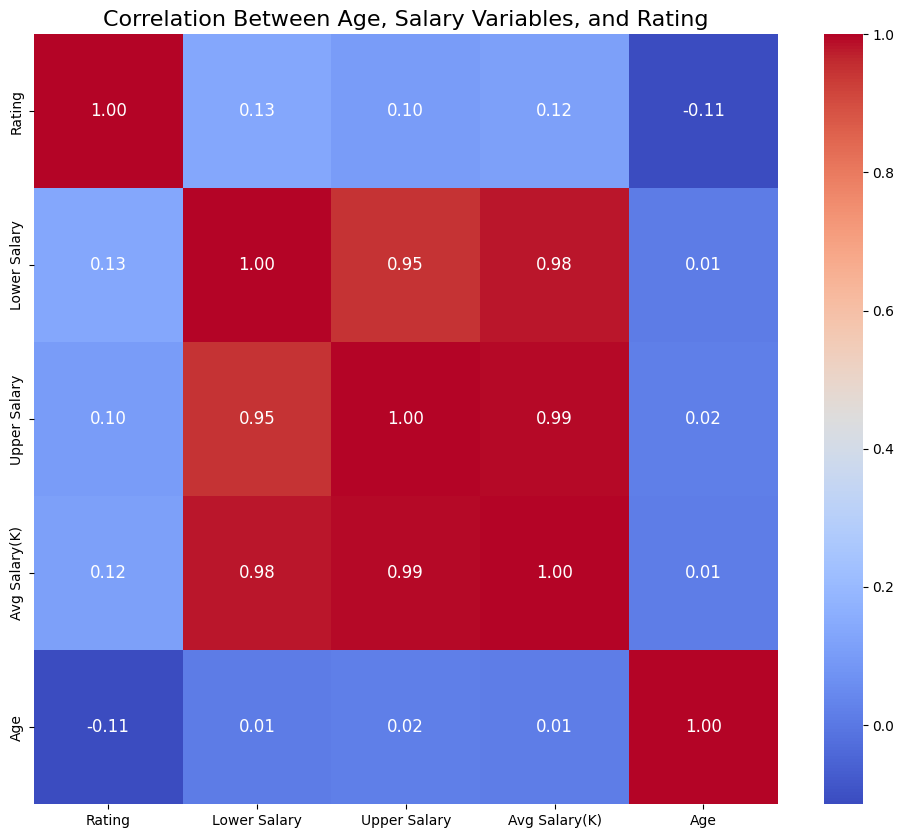

In [ ]:
# Correlation Between Numerical Variables
plt.figure(figsize=(12, 10))  # Increased size for better readability
correlation = data[['Rating', 'Lower Salary', 'Upper Salary', 'Avg Salary(K)', 'Age']].corr()

sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 12})  # Added `annot_kws` to make annotations larger
plt.title('Correlation Between Age, Salary Variables, and Rating', fontsize=16)

plt.show()


## Insights and Recommendations


Average Salaries varies with Job Titles. Positions, such as Director, Machine Learning Engineer, Data Scientist and Data Engineer command significantly higher salaries compared to roles like analyst, and data analytics. A further look at the data may reveal how to qualify for high paying job roles.

Higher qualifications often lead to better-pay. However, since the gap is not too wide, it may mean that some companies may favor experience over degrees.

Certain degrees align closely with high-paying job titles. For example, PhD holders seem to have more opportunities to the top 2 highest paid job positions (Director and Machine Learning Engineer). Class of Degree does not seem to matter across other job positions.

Certain states and cities offer higher average salaries. Considering relocation to high-demand areas can significantly boost your earning potential.

Sectors like Media, Biotech & Pharmaceuticals, and Information Technology have the highest average salaries for Data Analyst roles. Further investigation into specific industries within these sectors reveals that industries like Motion Picture Production & Distribution, Financial Analytics & Research, and Computer Hardware & Software are associated with top-tier earning potential.

Tools like flink, keras, scikit, and tensor are associated with the highest average salaries and are often associated with Data Scientist and Data Engineer job titles. This suggests that expertise in these technologies is highly valued. However, to be better positioned for these job titles, tools like python, sql, excel, tableau, spark, aws, sas, bi, cannot be ignored.

The type of ownership significantly influences salaries. Companies with ownership types like Subsidiary or Business Segment, Public Companies, and College/University tend to offer higher average salaries compared to other types. Conversely, Nonprofit Organization, Hospital, and School district types generally have lower average salaries.

There is a slight positive correlation between company ratings and salaries. This implies that companies with higher ratings tend to offer better salaries. However, this may be subject to other factors.

The relationship between company age and average salary is not strictly linear. This suggests that company age cannot be used as the sole determinant of salary, and other factors are at play. It could be that the salary growth rate is faster in the early stages of a company's life and then slows down as the company matures.

Individually, the age and rating of companies have minimal influence on Data Analyst salaries in this dataset. However, there is a slight positive correlation between age and rating, which suggests a potential link between company maturity and reputation.
